In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("EV_Database2_UK.csv")

In [3]:
df.sample(10)

,Brand,Availability_Status,Range,Efficiency,Weight,Accleration,Battery_Capacity,Seating_Capacity,Boot Space,Price_Per_Range,Model Price
398,BMW i5 M60 xDrive Saloon,Discontinued (May 2023 - April 2025),260 mi,312 Wh/mi,"2,380 kg",3.8 sec,81.2 kWh,5,490 L,£376 /mi,"£97,745"
250,Audi e-tron GT RS,Discontinued (May 2021 - February 2024),250 mi,340 Wh/mi,"2,420 kg",3.3 sec,85.0 kWh,4,451 L,£476 /mi,"£119,000"
608,Smart #1 Pure,Available to order since May 2025,155 mi,303 Wh/mi,"1,855 kg",6.7 sec,47.0 kWh,5,338 L,£193 /mi,"£29,960"
535,Hyundai IONIQ 5 Project 45 (MY21),Discontinued (July 2021 - October 2021),225 mi,311 Wh/mi,"2,095 kg",5.2 sec,70.0 kWh,5,555 L,£213 /mi,"£48,000"
106,CUPRA Tavascan Endurance,Available to order since September 2024,275 mi,280 Wh/mi,"2,178 kg",6.8 sec,77.0 kWh,5,540 L,£172 /mi,"£47,340"
82,MG MG4 EV Extended Range,Available to order since August 2023,265 mi,281 Wh/mi,"1,826 kg",6.5 sec,74.4 kWh,5,363 L,£138 /mi,"£36,495"
58,Skoda Enyaq iV 80,Discontinued (May 2021 - October 2023),270 mi,285 Wh/mi,"2,075 kg",8.6 sec,77.0 kWh,5,585 L,£159 /mi,"£42,925"
137,BMW i4 eDrive35,Available to order since June 2024,265 mi,253 Wh/mi,"2,075 kg",6.0 sec,67.1 kWh,5,470 L,£193 /mi,"£51,270"
460,Porsche Taycan Turbo GT Weissach,Available to order since March 2024,295 mi,329 Wh/mi,"2,295 kg",2.2 sec,97.0 kWh,2,451 L,£632 /mi,"£186,300"
349,Mazda 6e 68.8 kWh,Available to order from February 2026,240 mi,275 Wh/mi,"2,028 kg",7.6 sec,66.0 kWh,5,526 L,£158 /mi,"£38,000 *"


## Dealing With Null's and Outlier's

In [5]:
df.isna().sum()

Brand                  0
Availability_Status    0
Range                  0
Efficiency             0
Weight                 0
Accleration            0
Battery_Capacity       0
Seating_Capacity       0
Boot Space             0
Price_Per_Range        0
Model Price            0
dtype: int64

## Separating Brand and Model names of the car 

In [7]:
#df['Brand'] = df['Brand'].apply(lambda x : x.split()[0])
df['Model'] =  df['Brand'].apply(lambda x : ' '.join(x.split()[1:]))

In [8]:
df

,Brand,Availability_Status,Range,Efficiency,Weight,Accleration,Battery_Capacity,Seating_Capacity,Boot Space,Price_Per_Range,Model Price,Model
0,Tesla Model Y Long Range AWD,Discontinued (February 2022 - February 2025),275 mi,273 Wh/mi,"2,054 kg",5.0 sec,75.0 kWh,7,971 L,£189 /mi,"£51,990",Model Y Long Range AWD
1,Tesla Model 3 Long Range AWD,Discontinued (February 2022 - October 2023),300 mi,250 Wh/mi,"1,919 kg",4.4 sec,75.0 kWh,5,649 L,£170 /mi,"£50,990",Model 3 Long Range AWD
2,Kia EV3 Long Range,Available to order since October 2024,280 mi,279 Wh/mi,"1,885 kg",7.7 sec,78.0 kWh,5,485 L,£129 /mi,"£35,995",EV3 Long Range
3,Tesla Model 3 RWD (Highland CATL LFP64),Available to order since May 2025,275 mi,220 Wh/mi,"1,836 kg",6.1 sec,60.5 kWh,5,682 L,£145 /mi,"£39,990",Model 3 RWD (Highland CATL LFP64)
4,Tesla Model Y RWD (Juniper),Available to order since February 2025,235 mi,257 Wh/mi,"2,003 kg",5.9 sec,60.5 kWh,5,971 L,£191 /mi,"£44,990",Model Y RWD (Juniper)
...,...,...,...,...,...,...,...,...,...,...,...,...
741,Smart ForTwo Cabrio Electric Drive,Discontinued (July 2017 - April 2018),55 mi,304 Wh/mi,"1,115 kg",11.8 sec,16.7 kWh,2,260 L,£337 /mi,"£18,560",ForTwo Cabrio Electric Drive
742,Kia e-Niro 39 kWh,Discontinued (July 2020 - December 2020),145 mi,270 Wh/mi,"1,667 kg",9.8 sec,39.2 kWh,5,451 L,£204 /mi,"£29,595",e-Niro 39 kWh
743,Peugeot e-Rifter Standard 50 kWh,Discontinued (October 2021 - January 2024),125 mi,370 Wh/mi,"1,765 kg",11.7 sec,46.3 kWh,7,571 L,£265 /mi,"£33,120",e-Rifter Standard 50 kWh
744,Peugeot e-Traveller Standard 50 kWh,Discontinued (June 2021 - January 2024),115 mi,403 Wh/mi,"1,969 kg",13.1 sec,46.3 kWh,9,603 L,£372 /mi,"£42,785",e-Traveller Standard 50 kWh


In [9]:
df['Brand'] = df['Brand'].apply(lambda x : x.split()[0])

In [10]:
df.head()

,Brand,Availability_Status,Range,Efficiency,Weight,Accleration,Battery_Capacity,Seating_Capacity,Boot Space,Price_Per_Range,Model Price,Model
0,Tesla,Discontinued (February 2022 - February 2025),275 mi,273 Wh/mi,"2,054 kg",5.0 sec,75.0 kWh,7,971 L,£189 /mi,"£51,990",Model Y Long Range AWD
1,Tesla,Discontinued (February 2022 - October 2023),300 mi,250 Wh/mi,"1,919 kg",4.4 sec,75.0 kWh,5,649 L,£170 /mi,"£50,990",Model 3 Long Range AWD
2,Kia,Available to order since October 2024,280 mi,279 Wh/mi,"1,885 kg",7.7 sec,78.0 kWh,5,485 L,£129 /mi,"£35,995",EV3 Long Range
3,Tesla,Available to order since May 2025,275 mi,220 Wh/mi,"1,836 kg",6.1 sec,60.5 kWh,5,682 L,£145 /mi,"£39,990",Model 3 RWD (Highland CATL LFP64)
4,Tesla,Available to order since February 2025,235 mi,257 Wh/mi,"2,003 kg",5.9 sec,60.5 kWh,5,971 L,£191 /mi,"£44,990",Model Y RWD (Juniper)


In [11]:
#Moving Last Column to position after Brand Column
cols = list(df.columns)
cols

['Brand',
 'Availability_Status',
 'Range',
 'Efficiency',
 'Weight',
 'Accleration',
 'Battery_Capacity',
 'Seating_Capacity',
 'Boot Space',
 'Price_Per_Range',
 'Model Price',
 'Model']

In [12]:
last_cols = cols[-1]

In [13]:
last_cols

'Model'

In [14]:
new_order = ['Brand', last_cols] + [col for col in cols if col not in ['Brand', last_cols]]
df = df[new_order]

In [15]:
df

,Brand,Model,Availability_Status,Range,Efficiency,Weight,Accleration,Battery_Capacity,Seating_Capacity,Boot Space,Price_Per_Range,Model Price
0,Tesla,Model Y Long Range AWD,Discontinued (February 2022 - February 2025),275 mi,273 Wh/mi,"2,054 kg",5.0 sec,75.0 kWh,7,971 L,£189 /mi,"£51,990"
1,Tesla,Model 3 Long Range AWD,Discontinued (February 2022 - October 2023),300 mi,250 Wh/mi,"1,919 kg",4.4 sec,75.0 kWh,5,649 L,£170 /mi,"£50,990"
2,Kia,EV3 Long Range,Available to order since October 2024,280 mi,279 Wh/mi,"1,885 kg",7.7 sec,78.0 kWh,5,485 L,£129 /mi,"£35,995"
3,Tesla,Model 3 RWD (Highland CATL LFP64),Available to order since May 2025,275 mi,220 Wh/mi,"1,836 kg",6.1 sec,60.5 kWh,5,682 L,£145 /mi,"£39,990"
4,Tesla,Model Y RWD (Juniper),Available to order since February 2025,235 mi,257 Wh/mi,"2,003 kg",5.9 sec,60.5 kWh,5,971 L,£191 /mi,"£44,990"
...,...,...,...,...,...,...,...,...,...,...,...,...
741,Smart,ForTwo Cabrio Electric Drive,Discontinued (July 2017 - April 2018),55 mi,304 Wh/mi,"1,115 kg",11.8 sec,16.7 kWh,2,260 L,£337 /mi,"£18,560"
742,Kia,e-Niro 39 kWh,Discontinued (July 2020 - December 2020),145 mi,270 Wh/mi,"1,667 kg",9.8 sec,39.2 kWh,5,451 L,£204 /mi,"£29,595"
743,Peugeot,e-Rifter Standard 50 kWh,Discontinued (October 2021 - January 2024),125 mi,370 Wh/mi,"1,765 kg",11.7 sec,46.3 kWh,7,571 L,£265 /mi,"£33,120"
744,Peugeot,e-Traveller Standard 50 kWh,Discontinued (June 2021 - January 2024),115 mi,403 Wh/mi,"1,969 kg",13.1 sec,46.3 kWh,9,603 L,£372 /mi,"£42,785"


In [16]:
df['Availability'] = df['Availability_Status'].apply(lambda x : x.split()[0])

C:\Users\DELL\AppData\Local\Temp\ipykernel_23116\3337655218.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Availability'] = df['Availability_Status'].apply(lambda x : x.split()[0])


In [17]:
df.head()

,Brand,Model,Availability_Status,Range,Efficiency,Weight,Accleration,Battery_Capacity,Seating_Capacity,Boot Space,Price_Per_Range,Model Price,Availability
0,Tesla,Model Y Long Range AWD,Discontinued (February 2022 - February 2025),275 mi,273 Wh/mi,"2,054 kg",5.0 sec,75.0 kWh,7,971 L,£189 /mi,"£51,990",Discontinued
1,Tesla,Model 3 Long Range AWD,Discontinued (February 2022 - October 2023),300 mi,250 Wh/mi,"1,919 kg",4.4 sec,75.0 kWh,5,649 L,£170 /mi,"£50,990",Discontinued
2,Kia,EV3 Long Range,Available to order since October 2024,280 mi,279 Wh/mi,"1,885 kg",7.7 sec,78.0 kWh,5,485 L,£129 /mi,"£35,995",Available
3,Tesla,Model 3 RWD (Highland CATL LFP64),Available to order since May 2025,275 mi,220 Wh/mi,"1,836 kg",6.1 sec,60.5 kWh,5,682 L,£145 /mi,"£39,990",Available
4,Tesla,Model Y RWD (Juniper),Available to order since February 2025,235 mi,257 Wh/mi,"2,003 kg",5.9 sec,60.5 kWh,5,971 L,£191 /mi,"£44,990",Available


In [18]:
# Assuming df is your DataFrame
cols = list(df.columns)

# Identify the target columns
col_to_move = "Availability"
before_col = "Availability_Status"

# Remove 'Availability' from current position
cols.remove(col_to_move)

# Find the index where to insert
insert_at = cols.index(before_col)

# Insert 'Availability' before 'Availability_Status'
cols.insert(insert_at, col_to_move)

# Reorder DataFrame
df = df[cols]


In [19]:
insert_at

2

In [20]:
df.head()

,Brand,Model,Availability,Availability_Status,Range,Efficiency,Weight,Accleration,Battery_Capacity,Seating_Capacity,Boot Space,Price_Per_Range,Model Price
0,Tesla,Model Y Long Range AWD,Discontinued,Discontinued (February 2022 - February 2025),275 mi,273 Wh/mi,"2,054 kg",5.0 sec,75.0 kWh,7,971 L,£189 /mi,"£51,990"
1,Tesla,Model 3 Long Range AWD,Discontinued,Discontinued (February 2022 - October 2023),300 mi,250 Wh/mi,"1,919 kg",4.4 sec,75.0 kWh,5,649 L,£170 /mi,"£50,990"
2,Kia,EV3 Long Range,Available,Available to order since October 2024,280 mi,279 Wh/mi,"1,885 kg",7.7 sec,78.0 kWh,5,485 L,£129 /mi,"£35,995"
3,Tesla,Model 3 RWD (Highland CATL LFP64),Available,Available to order since May 2025,275 mi,220 Wh/mi,"1,836 kg",6.1 sec,60.5 kWh,5,682 L,£145 /mi,"£39,990"
4,Tesla,Model Y RWD (Juniper),Available,Available to order since February 2025,235 mi,257 Wh/mi,"2,003 kg",5.9 sec,60.5 kWh,5,971 L,£191 /mi,"£44,990"


In [21]:
df['Efficiency'] = df['Efficiency'].str.replace('Wh/mi','')

In [22]:
df = df.rename(columns={'Efficiency': 'Efficiency(Wh/mile)'})

In [23]:
df['Range'] = df['Range'].str.replace(' mi','')

In [24]:
df = df.rename(columns={'Range': 'Range(in_mile)'})

In [25]:
df.head(3)

,Brand,Model,Availability,Availability_Status,Range(in_mile),Efficiency(Wh/mile),Weight,Accleration,Battery_Capacity,Seating_Capacity,Boot Space,Price_Per_Range,Model Price
0,Tesla,Model Y Long Range AWD,Discontinued,Discontinued (February 2022 - February 2025),275,273,"2,054 kg",5.0 sec,75.0 kWh,7,971 L,£189 /mi,"£51,990"
1,Tesla,Model 3 Long Range AWD,Discontinued,Discontinued (February 2022 - October 2023),300,250,"1,919 kg",4.4 sec,75.0 kWh,5,649 L,£170 /mi,"£50,990"
2,Kia,EV3 Long Range,Available,Available to order since October 2024,280,279,"1,885 kg",7.7 sec,78.0 kWh,5,485 L,£129 /mi,"£35,995"


In [26]:
df.groupby(by=['Brand','Price_Per_Range'])['Efficiency(Wh/mile)'].min()	

Brand   Price_Per_Range
Abarth  £218 /mi           299 
        £235 /mi           299 
        £244 /mi           270 
        £266 /mi           270 
        £276 /mi           270 
                           ... 
Volvo   £290 /mi           351 
        £309 /mi           369 
        £357 /mi           382 
XPENG   £150 /mi           292 
        £174 /mi           287 
Name: Efficiency(Wh/mile), Length: 646, dtype: object

In [27]:
df['Weight'] = df['Weight'].str.replace('kg','')

In [28]:
df.head(1)

,Brand,Model,Availability,Availability_Status,Range(in_mile),Efficiency(Wh/mile),Weight,Accleration,Battery_Capacity,Seating_Capacity,Boot Space,Price_Per_Range,Model Price
0,Tesla,Model Y Long Range AWD,Discontinued,Discontinued (February 2022 - February 2025),275,273,"2,054",5.0 sec,75.0 kWh,7,971 L,£189 /mi,"£51,990"


In [29]:
df = df.rename(columns={'Weight': 'Weight_in_Kg'})

In [30]:
df.head(1)

,Brand,Model,Availability,Availability_Status,Range(in_mile),Efficiency(Wh/mile),Weight_in_Kg,Accleration,Battery_Capacity,Seating_Capacity,Boot Space,Price_Per_Range,Model Price
0,Tesla,Model Y Long Range AWD,Discontinued,Discontinued (February 2022 - February 2025),275,273,"2,054",5.0 sec,75.0 kWh,7,971 L,£189 /mi,"£51,990"


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 746 entries, 0 to 745
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Brand                746 non-null    object
 1   Model                746 non-null    object
 2   Availability         746 non-null    object
 3   Availability_Status  746 non-null    object
 4   Range(in_mile)       746 non-null    object
 5   Efficiency(Wh/mile)  746 non-null    object
 6   Weight_in_Kg         746 non-null    object
 7   Accleration          746 non-null    object
 8   Battery_Capacity     746 non-null    object
 9   Seating_Capacity     746 non-null    int64 
 10  Boot Space           746 non-null    object
 11  Price_Per_Range      746 non-null    object
 12  Model Price          746 non-null    object
dtypes: int64(1), object(12)
memory usage: 75.9+ KB


In [32]:
df['Efficiency(Wh/mile)'] = df['Efficiency(Wh/mile)'].astype(float)

In [33]:
df["Weight_in_Kg"] = df["Weight_in_Kg"].str.replace(',', '')       # remove commas
df["Weight_in_Kg"] = df["Weight_in_Kg"].str.extract('(\d+)')        # extract digits only
df["Weight_in_Kg"] = df["Weight_in_Kg"].astype(float)                 # convert to integer


<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\DELL\AppData\Local\Temp\ipykernel_23116\3190388586.py:2: SyntaxWarning: invalid escape sequence '\d'
  df["Weight_in_Kg"] = df["Weight_in_Kg"].str.extract('(\d+)')        # extract digits only


In [34]:
df

,Brand,Model,Availability,Availability_Status,Range(in_mile),Efficiency(Wh/mile),Weight_in_Kg,Accleration,Battery_Capacity,Seating_Capacity,Boot Space,Price_Per_Range,Model Price
0,Tesla,Model Y Long Range AWD,Discontinued,Discontinued (February 2022 - February 2025),275,273.0,2054.0,5.0 sec,75.0 kWh,7,971 L,£189 /mi,"£51,990"
1,Tesla,Model 3 Long Range AWD,Discontinued,Discontinued (February 2022 - October 2023),300,250.0,1919.0,4.4 sec,75.0 kWh,5,649 L,£170 /mi,"£50,990"
2,Kia,EV3 Long Range,Available,Available to order since October 2024,280,279.0,1885.0,7.7 sec,78.0 kWh,5,485 L,£129 /mi,"£35,995"
3,Tesla,Model 3 RWD (Highland CATL LFP64),Available,Available to order since May 2025,275,220.0,1836.0,6.1 sec,60.5 kWh,5,682 L,£145 /mi,"£39,990"
4,Tesla,Model Y RWD (Juniper),Available,Available to order since February 2025,235,257.0,2003.0,5.9 sec,60.5 kWh,5,971 L,£191 /mi,"£44,990"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
741,Smart,ForTwo Cabrio Electric Drive,Discontinued,Discontinued (July 2017 - April 2018),55,304.0,1115.0,11.8 sec,16.7 kWh,2,260 L,£337 /mi,"£18,560"
742,Kia,e-Niro 39 kWh,Discontinued,Discontinued (July 2020 - December 2020),145,270.0,1667.0,9.8 sec,39.2 kWh,5,451 L,£204 /mi,"£29,595"
743,Peugeot,e-Rifter Standard 50 kWh,Discontinued,Discontinued (October 2021 - January 2024),125,370.0,1765.0,11.7 sec,46.3 kWh,7,571 L,£265 /mi,"£33,120"
744,Peugeot,e-Traveller Standard 50 kWh,Discontinued,Discontinued (June 2021 - January 2024),115,403.0,1969.0,13.1 sec,46.3 kWh,9,603 L,£372 /mi,"£42,785"


In [35]:
df['Accleration'] = df['Accleration'].str.replace('sec','')

In [36]:
df = df.rename(columns={'Accleration': 't_0_60_mph'})

In [37]:
df.head()

,Brand,Model,Availability,Availability_Status,Range(in_mile),Efficiency(Wh/mile),Weight_in_Kg,t_0_60_mph,Battery_Capacity,Seating_Capacity,Boot Space,Price_Per_Range,Model Price
0,Tesla,Model Y Long Range AWD,Discontinued,Discontinued (February 2022 - February 2025),275,273.0,2054.0,5.0,75.0 kWh,7,971 L,£189 /mi,"£51,990"
1,Tesla,Model 3 Long Range AWD,Discontinued,Discontinued (February 2022 - October 2023),300,250.0,1919.0,4.4,75.0 kWh,5,649 L,£170 /mi,"£50,990"
2,Kia,EV3 Long Range,Available,Available to order since October 2024,280,279.0,1885.0,7.7,78.0 kWh,5,485 L,£129 /mi,"£35,995"
3,Tesla,Model 3 RWD (Highland CATL LFP64),Available,Available to order since May 2025,275,220.0,1836.0,6.1,60.5 kWh,5,682 L,£145 /mi,"£39,990"
4,Tesla,Model Y RWD (Juniper),Available,Available to order since February 2025,235,257.0,2003.0,5.9,60.5 kWh,5,971 L,£191 /mi,"£44,990"


In [38]:
df['Battery_Capacity'] = df['Battery_Capacity'].str.replace('kWh','')

In [39]:
df = df.rename(columns={'Battery_Capacity': 'Battery_Capacity(kWh)'})

In [40]:
df.head()

,Brand,Model,Availability,Availability_Status,Range(in_mile),Efficiency(Wh/mile),Weight_in_Kg,t_0_60_mph,Battery_Capacity(kWh),Seating_Capacity,Boot Space,Price_Per_Range,Model Price
0,Tesla,Model Y Long Range AWD,Discontinued,Discontinued (February 2022 - February 2025),275,273.0,2054.0,5.0,75.0,7,971 L,£189 /mi,"£51,990"
1,Tesla,Model 3 Long Range AWD,Discontinued,Discontinued (February 2022 - October 2023),300,250.0,1919.0,4.4,75.0,5,649 L,£170 /mi,"£50,990"
2,Kia,EV3 Long Range,Available,Available to order since October 2024,280,279.0,1885.0,7.7,78.0,5,485 L,£129 /mi,"£35,995"
3,Tesla,Model 3 RWD (Highland CATL LFP64),Available,Available to order since May 2025,275,220.0,1836.0,6.1,60.5,5,682 L,£145 /mi,"£39,990"
4,Tesla,Model Y RWD (Juniper),Available,Available to order since February 2025,235,257.0,2003.0,5.9,60.5,5,971 L,£191 /mi,"£44,990"


In [41]:
df["t_0_60_mph"] = df["t_0_60_mph"].astype(float) 

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 746 entries, 0 to 745
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Brand                  746 non-null    object 
 1   Model                  746 non-null    object 
 2   Availability           746 non-null    object 
 3   Availability_Status    746 non-null    object 
 4   Range(in_mile)         746 non-null    object 
 5   Efficiency(Wh/mile)    746 non-null    float64
 6   Weight_in_Kg           746 non-null    float64
 7   t_0_60_mph             746 non-null    float64
 8   Battery_Capacity(kWh)  746 non-null    object 
 9   Seating_Capacity       746 non-null    int64  
 10  Boot Space             746 non-null    object 
 11  Price_Per_Range        746 non-null    object 
 12  Model Price            746 non-null    object 
dtypes: float64(3), int64(1), object(9)
memory usage: 75.9+ KB


In [43]:
df["Battery_Capacity(kWh)"] = df["Battery_Capacity(kWh)"].astype(float) 

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 746 entries, 0 to 745
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Brand                  746 non-null    object 
 1   Model                  746 non-null    object 
 2   Availability           746 non-null    object 
 3   Availability_Status    746 non-null    object 
 4   Range(in_mile)         746 non-null    object 
 5   Efficiency(Wh/mile)    746 non-null    float64
 6   Weight_in_Kg           746 non-null    float64
 7   t_0_60_mph             746 non-null    float64
 8   Battery_Capacity(kWh)  746 non-null    float64
 9   Seating_Capacity       746 non-null    int64  
 10  Boot Space             746 non-null    object 
 11  Price_Per_Range        746 non-null    object 
 12  Model Price            746 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 75.9+ KB


In [45]:
df['Boot Space'] = df['Boot Space'].str.replace('L','')

In [46]:
df.head()

,Brand,Model,Availability,Availability_Status,Range(in_mile),Efficiency(Wh/mile),Weight_in_Kg,t_0_60_mph,Battery_Capacity(kWh),Seating_Capacity,Boot Space,Price_Per_Range,Model Price
0,Tesla,Model Y Long Range AWD,Discontinued,Discontinued (February 2022 - February 2025),275,273.0,2054.0,5.0,75.0,7,971,£189 /mi,"£51,990"
1,Tesla,Model 3 Long Range AWD,Discontinued,Discontinued (February 2022 - October 2023),300,250.0,1919.0,4.4,75.0,5,649,£170 /mi,"£50,990"
2,Kia,EV3 Long Range,Available,Available to order since October 2024,280,279.0,1885.0,7.7,78.0,5,485,£129 /mi,"£35,995"
3,Tesla,Model 3 RWD (Highland CATL LFP64),Available,Available to order since May 2025,275,220.0,1836.0,6.1,60.5,5,682,£145 /mi,"£39,990"
4,Tesla,Model Y RWD (Juniper),Available,Available to order since February 2025,235,257.0,2003.0,5.9,60.5,5,971,£191 /mi,"£44,990"


In [47]:
df = df.rename(columns={'Boot Space': 'Boot Space(in_Litres)'})

In [48]:
df.head()

,Brand,Model,Availability,Availability_Status,Range(in_mile),Efficiency(Wh/mile),Weight_in_Kg,t_0_60_mph,Battery_Capacity(kWh),Seating_Capacity,Boot Space(in_Litres),Price_Per_Range,Model Price
0,Tesla,Model Y Long Range AWD,Discontinued,Discontinued (February 2022 - February 2025),275,273.0,2054.0,5.0,75.0,7,971,£189 /mi,"£51,990"
1,Tesla,Model 3 Long Range AWD,Discontinued,Discontinued (February 2022 - October 2023),300,250.0,1919.0,4.4,75.0,5,649,£170 /mi,"£50,990"
2,Kia,EV3 Long Range,Available,Available to order since October 2024,280,279.0,1885.0,7.7,78.0,5,485,£129 /mi,"£35,995"
3,Tesla,Model 3 RWD (Highland CATL LFP64),Available,Available to order since May 2025,275,220.0,1836.0,6.1,60.5,5,682,£145 /mi,"£39,990"
4,Tesla,Model Y RWD (Juniper),Available,Available to order since February 2025,235,257.0,2003.0,5.9,60.5,5,971,£191 /mi,"£44,990"


In [49]:
df["Boot Space(in_Litres)"] = df["Boot Space(in_Litres)"].str.replace(',', '')       # remove commas
df["Boot Space(in_Litres)"] = df["Boot Space(in_Litres)"].str.extract('(\d+)')        # extract digits only
df["Boot Space(in_Litres)"] = df["Boot Space(in_Litres)"].astype(float)   

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\DELL\AppData\Local\Temp\ipykernel_23116\3362158145.py:2: SyntaxWarning: invalid escape sequence '\d'
  df["Boot Space(in_Litres)"] = df["Boot Space(in_Litres)"].str.extract('(\d+)')        # extract digits only


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 746 entries, 0 to 745
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Brand                  746 non-null    object 
 1   Model                  746 non-null    object 
 2   Availability           746 non-null    object 
 3   Availability_Status    746 non-null    object 
 4   Range(in_mile)         746 non-null    object 
 5   Efficiency(Wh/mile)    746 non-null    float64
 6   Weight_in_Kg           746 non-null    float64
 7   t_0_60_mph             746 non-null    float64
 8   Battery_Capacity(kWh)  746 non-null    float64
 9   Seating_Capacity       746 non-null    int64  
 10  Boot Space(in_Litres)  726 non-null    float64
 11  Price_Per_Range        746 non-null    object 
 12  Model Price            746 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 75.9+ KB


In [51]:
df['Price_Per_Range'] = df['Price_Per_Range'].str.replace(r'[£€$,/a-zA-Z]', '', regex=True)

In [52]:
df.head()

,Brand,Model,Availability,Availability_Status,Range(in_mile),Efficiency(Wh/mile),Weight_in_Kg,t_0_60_mph,Battery_Capacity(kWh),Seating_Capacity,Boot Space(in_Litres),Price_Per_Range,Model Price
0,Tesla,Model Y Long Range AWD,Discontinued,Discontinued (February 2022 - February 2025),275,273.0,2054.0,5.0,75.0,7,971.0,189,"£51,990"
1,Tesla,Model 3 Long Range AWD,Discontinued,Discontinued (February 2022 - October 2023),300,250.0,1919.0,4.4,75.0,5,649.0,170,"£50,990"
2,Kia,EV3 Long Range,Available,Available to order since October 2024,280,279.0,1885.0,7.7,78.0,5,485.0,129,"£35,995"
3,Tesla,Model 3 RWD (Highland CATL LFP64),Available,Available to order since May 2025,275,220.0,1836.0,6.1,60.5,5,682.0,145,"£39,990"
4,Tesla,Model Y RWD (Juniper),Available,Available to order since February 2025,235,257.0,2003.0,5.9,60.5,5,971.0,191,"£44,990"


In [53]:
df['Price_Per_Range'] = pd.to_numeric(df['Price_Per_Range'], errors='coerce')

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 746 entries, 0 to 745
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Brand                  746 non-null    object 
 1   Model                  746 non-null    object 
 2   Availability           746 non-null    object 
 3   Availability_Status    746 non-null    object 
 4   Range(in_mile)         746 non-null    object 
 5   Efficiency(Wh/mile)    746 non-null    float64
 6   Weight_in_Kg           746 non-null    float64
 7   t_0_60_mph             746 non-null    float64
 8   Battery_Capacity(kWh)  746 non-null    float64
 9   Seating_Capacity       746 non-null    int64  
 10  Boot Space(in_Litres)  726 non-null    float64
 11  Price_Per_Range        726 non-null    float64
 12  Model Price            746 non-null    object 
dtypes: float64(6), int64(1), object(6)
memory usage: 75.9+ KB


In [55]:
df['Model Price'] = df['Model Price'].str.replace(r'[£€$,/a-zA-Z]', '', regex=True)

In [56]:
df.head(1)

,Brand,Model,Availability,Availability_Status,Range(in_mile),Efficiency(Wh/mile),Weight_in_Kg,t_0_60_mph,Battery_Capacity(kWh),Seating_Capacity,Boot Space(in_Litres),Price_Per_Range,Model Price
0,Tesla,Model Y Long Range AWD,Discontinued,Discontinued (February 2022 - February 2025),275,273.0,2054.0,5.0,75.0,7,971.0,189.0,51990


In [57]:
df = df.rename(columns={'Price_Per_Range': 'Price_Per_Range(in_£)'})

In [58]:
df = df.rename(columns={'Model Price': 'Model Price(in_£)'})

In [59]:
df.head(3)

,Brand,Model,Availability,Availability_Status,Range(in_mile),Efficiency(Wh/mile),Weight_in_Kg,t_0_60_mph,Battery_Capacity(kWh),Seating_Capacity,Boot Space(in_Litres),Price_Per_Range(in_£),Model Price(in_£)
0,Tesla,Model Y Long Range AWD,Discontinued,Discontinued (February 2022 - February 2025),275,273.0,2054.0,5.0,75.0,7,971.0,189.0,51990
1,Tesla,Model 3 Long Range AWD,Discontinued,Discontinued (February 2022 - October 2023),300,250.0,1919.0,4.4,75.0,5,649.0,170.0,50990
2,Kia,EV3 Long Range,Available,Available to order since October 2024,280,279.0,1885.0,7.7,78.0,5,485.0,129.0,35995


In [60]:
df['Availability_Status'] = df['Availability_Status'].apply(lambda x : ' '.join(x.split()[1:]))

In [61]:
df

,Brand,Model,Availability,Availability_Status,Range(in_mile),Efficiency(Wh/mile),Weight_in_Kg,t_0_60_mph,Battery_Capacity(kWh),Seating_Capacity,Boot Space(in_Litres),Price_Per_Range(in_£),Model Price(in_£)
0,Tesla,Model Y Long Range AWD,Discontinued,(February 2022 - February 2025),275,273.0,2054.0,5.0,75.0,7,971.0,189.0,51990
1,Tesla,Model 3 Long Range AWD,Discontinued,(February 2022 - October 2023),300,250.0,1919.0,4.4,75.0,5,649.0,170.0,50990
2,Kia,EV3 Long Range,Available,to order since October 2024,280,279.0,1885.0,7.7,78.0,5,485.0,129.0,35995
3,Tesla,Model 3 RWD (Highland CATL LFP64),Available,to order since May 2025,275,220.0,1836.0,6.1,60.5,5,682.0,145.0,39990
4,Tesla,Model Y RWD (Juniper),Available,to order since February 2025,235,257.0,2003.0,5.9,60.5,5,971.0,191.0,44990
...,...,...,...,...,...,...,...,...,...,...,...,...,...
741,Smart,ForTwo Cabrio Electric Drive,Discontinued,(July 2017 - April 2018),55,304.0,1115.0,11.8,16.7,2,260.0,337.0,18560
742,Kia,e-Niro 39 kWh,Discontinued,(July 2020 - December 2020),145,270.0,1667.0,9.8,39.2,5,451.0,204.0,29595
743,Peugeot,e-Rifter Standard 50 kWh,Discontinued,(October 2021 - January 2024),125,370.0,1765.0,11.7,46.3,7,571.0,265.0,33120
744,Peugeot,e-Traveller Standard 50 kWh,Discontinued,(June 2021 - January 2024),115,403.0,1969.0,13.1,46.3,9,603.0,372.0,42785


In [62]:
df.isna().sum()

Brand                     0
Model                     0
Availability              0
Availability_Status       0
Range(in_mile)            0
Efficiency(Wh/mile)       0
Weight_in_Kg              0
t_0_60_mph                0
Battery_Capacity(kWh)     0
Seating_Capacity          0
Boot Space(in_Litres)    20
Price_Per_Range(in_£)    20
Model Price(in_£)         0
dtype: int64

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 746 entries, 0 to 745
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Brand                  746 non-null    object 
 1   Model                  746 non-null    object 
 2   Availability           746 non-null    object 
 3   Availability_Status    746 non-null    object 
 4   Range(in_mile)         746 non-null    object 
 5   Efficiency(Wh/mile)    746 non-null    float64
 6   Weight_in_Kg           746 non-null    float64
 7   t_0_60_mph             746 non-null    float64
 8   Battery_Capacity(kWh)  746 non-null    float64
 9   Seating_Capacity       746 non-null    int64  
 10  Boot Space(in_Litres)  726 non-null    float64
 11  Price_Per_Range(in_£)  726 non-null    float64
 12  Model Price(in_£)      746 non-null    object 
dtypes: float64(6), int64(1), object(6)
memory usage: 75.9+ KB


In [64]:
# Step 1: Remove all characters except digits and decimal points
df['Model Price(in_£)'] = df['Model Price(in_£)'].str.replace(r'[^0-9.]', '', regex=True)

# Step 2: Convert to float
df['Model Price(in_£)'] = pd.to_numeric(df['Model Price(in_£)'], errors='coerce')


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 746 entries, 0 to 745
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Brand                  746 non-null    object 
 1   Model                  746 non-null    object 
 2   Availability           746 non-null    object 
 3   Availability_Status    746 non-null    object 
 4   Range(in_mile)         746 non-null    object 
 5   Efficiency(Wh/mile)    746 non-null    float64
 6   Weight_in_Kg           746 non-null    float64
 7   t_0_60_mph             746 non-null    float64
 8   Battery_Capacity(kWh)  746 non-null    float64
 9   Seating_Capacity       746 non-null    int64  
 10  Boot Space(in_Litres)  726 non-null    float64
 11  Price_Per_Range(in_£)  726 non-null    float64
 12  Model Price(in_£)      746 non-null    int64  
dtypes: float64(6), int64(2), object(5)
memory usage: 75.9+ KB


In [66]:
df['Range(in_mile)'] = pd.to_numeric(df['Range(in_mile)'], errors='coerce')

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 746 entries, 0 to 745
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Brand                  746 non-null    object 
 1   Model                  746 non-null    object 
 2   Availability           746 non-null    object 
 3   Availability_Status    746 non-null    object 
 4   Range(in_mile)         746 non-null    int64  
 5   Efficiency(Wh/mile)    746 non-null    float64
 6   Weight_in_Kg           746 non-null    float64
 7   t_0_60_mph             746 non-null    float64
 8   Battery_Capacity(kWh)  746 non-null    float64
 9   Seating_Capacity       746 non-null    int64  
 10  Boot Space(in_Litres)  726 non-null    float64
 11  Price_Per_Range(in_£)  726 non-null    float64
 12  Model Price(in_£)      746 non-null    int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 75.9+ KB


In [68]:
df['Price_Per_Range(in_£)'] = df['Price_Per_Range(in_£)'].fillna(df['Model Price(in_£)']/df['Range(in_mile)'])

In [69]:
df['Price_Per_Range(in_£)']

0      189.0
1      170.0
2      129.0
3      145.0
4      191.0
       ...  
741    337.0
742    204.0
743    265.0
744    372.0
745    355.0
Name: Price_Per_Range(in_£), Length: 746, dtype: float64

In [70]:
df.isna().sum()

Brand                     0
Model                     0
Availability              0
Availability_Status       0
Range(in_mile)            0
Efficiency(Wh/mile)       0
Weight_in_Kg              0
t_0_60_mph                0
Battery_Capacity(kWh)     0
Seating_Capacity          0
Boot Space(in_Litres)    20
Price_Per_Range(in_£)     0
Model Price(in_£)         0
dtype: int64

<Axes: >

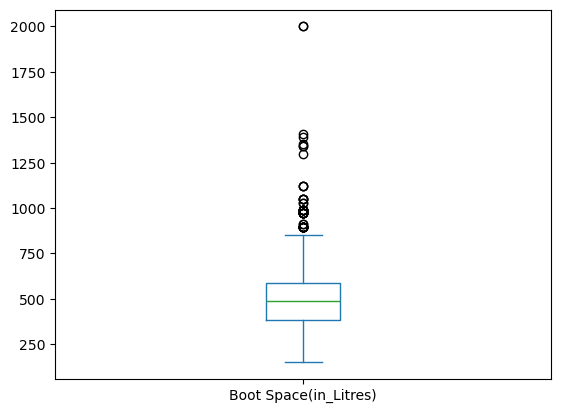

In [71]:
df['Boot Space(in_Litres)'].plot(kind ='box')

In [72]:
df['Boot Space(in_Litres)'].median()

491.0

In [143]:
df['Boot Space(in_Litres)']

0      971.0
1      649.0
2      485.0
3      682.0
4      971.0
       ...  
741    260.0
742    451.0
743    571.0
744    603.0
745    615.0
Name: Boot Space(in_Litres), Length: 746, dtype: float64

In [149]:
df['Boot Space(in_Litres)'] = df['Boot Space(in_Litres)'].fillna(df['Boot Space(in_Litres)'].median())

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 746 entries, 0 to 745
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Brand                  746 non-null    object 
 1   Model                  746 non-null    object 
 2   Availability           746 non-null    object 
 3   Availability_Status    746 non-null    object 
 4   Range(in_mile)         746 non-null    int64  
 5   Efficiency(Wh/mile)    746 non-null    float64
 6   Weight_in_Kg           746 non-null    float64
 7   t_0_60_mph             746 non-null    float64
 8   Battery_Capacity(kWh)  746 non-null    float64
 9   Seating_Capacity       746 non-null    int64  
 10  Boot Space(in_Litres)  746 non-null    float64
 11  Price_Per_Range(in_£)  746 non-null    float64
 12  Model Price(in_£)      746 non-null    int64  
dtypes: float64(6), int64(3), object(4)
memory usage: 75.9+ KB


In [153]:
df.to_csv('Cleaned_set1.csv',index=False)

In [155]:
df.head()

,Brand,Model,Availability,Availability_Status,Range(in_mile),Efficiency(Wh/mile),Weight_in_Kg,t_0_60_mph,Battery_Capacity(kWh),Seating_Capacity,Boot Space(in_Litres),Price_Per_Range(in_£),Model Price(in_£)
0,Tesla,Model Y Long Range AWD,Discontinued,(February 2022 - February 2025),275,273.0,2054.0,5.0,75.0,7,971.0,189.0,51990
1,Tesla,Model 3 Long Range AWD,Discontinued,(February 2022 - October 2023),300,250.0,1919.0,4.4,75.0,5,649.0,170.0,50990
2,Kia,EV3 Long Range,Available,to order since October 2024,280,279.0,1885.0,7.7,78.0,5,485.0,129.0,35995
3,Tesla,Model 3 RWD (Highland CATL LFP64),Available,to order since May 2025,275,220.0,1836.0,6.1,60.5,5,682.0,145.0,39990
4,Tesla,Model Y RWD (Juniper),Available,to order since February 2025,235,257.0,2003.0,5.9,60.5,5,971.0,191.0,44990
